In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import seaborn as sns

Merging 12 Months of sales data into a single file

In [2]:
directory_path = 'F:/Project/Real world data science tasks/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'

# List all files in the directory
files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Create an empty DataFrame to store the combined data
all_month_data = pd.DataFrame()

# Loop through each file and read its content into a DataFrame
for file in files:
    file_path = os.path.join(directory_path, file) # Important if you join the path 
    df = pd.read_csv(file_path)
    
    all_month_data = pd.concat([all_month_data, df])

 # Display the first few rows of the combined DataFrame
#all_month_data.head()   

# Save into single csv file
all_month_data.to_csv('all_data.csv', index=False)

Read in updated DataFrame

In [3]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Cleaning the data

In [4]:
print('Total length of the data:', len(all_data))
print(all_data.isna().sum())

Total length of the data: 186850
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [5]:
# drop the NaN value
# first copy the data
copy_all_data = all_data.copy()
# Now work only on copy_all_data
copy_all_data = copy_all_data.dropna()
copy_all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Find 'Or' and delete it (During the adding the month column we find that 'Or' value is involed in Order Date column)

In [6]:
print(copy_all_data[copy_all_data['Order Date'].str[:2] == 'Or'])

# update this

copy_all_data = copy_all_data[copy_all_data['Order Date'].str[:2] != 'Or']

        Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519     Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149    Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878    Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893    Order ID  Product  Quantity Ordered  Price Each  Order Date   
...          ...      ...               ...         ...         ...   
185164  Order ID  Product  Quantity Ordered  Price Each  Order Date   
185551  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186563  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186632  Order ID  Product  Quantity Ordered  Price Each  Order Date   
186738  Order ID  Product  Quantity Ordered  Price Each  Order Date   

        Purchase Address  
519     Purchase Address  
1149    Purchase Address  
1155    Purchase Address  
2878    Purchase Address  
2893    Purc

Convert columns to correct type
(During adding the Sales column we see column is Object instead numeric)

In [7]:
copy_all_data['Quantity Ordered'] = pd.to_numeric(copy_all_data['Quantity Ordered'])
copy_all_data['Price Each'] = pd.to_numeric(copy_all_data['Price Each'] )

Augment data with additional columns

Task 2: Add Month Column

In [8]:
copy_all_data['Order Date'].isna().sum()

0

In [9]:
print(copy_all_data['Order Date'].unique())

['04/19/19 08:46' '04/07/19 22:30' '04/12/19 14:38' ... '09/23/19 07:39'
 '09/19/19 17:30' '09/30/19 00:18']


In [10]:
# copy_all_data.head()

# # Remove rows where 'Order Date' is 'Order Date'
# copy_all_data = copy_all_data[copy_all_data['Order Date'] != 'Order Date']

# # Convert 'Order Date' to datetime and extract the month
# copy_all_data['Month'] = pd.to_datetime(copy_all_data['Order Date'], format='%m/%d/%y %H:%M').dt.month


# # Convert into integer
# copy_all_data['Month'].dtype

In [11]:
copy_all_data['Month'] = copy_all_data['Order Date'].str[:2]
copy_all_data['Month'] = copy_all_data['Month'].astype('int32')

copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Task 3: Add a sales column (Quantity Ordered X Price Each	)

In [12]:
print(copy_all_data['Quantity Ordered'].dtype)
print(copy_all_data['Price Each'].dtype)

int64
float64


In [13]:
copy_all_data['Sales'] = copy_all_data['Quantity Ordered'] * copy_all_data['Price Each']

In [14]:
copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Task 4: Add a City column

In [15]:
copy_all_data['City'] = copy_all_data['Purchase Address'].str.split(',').str[1]

In [16]:
copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Question 1: What was the best month for sales? How much was earned that month?

In [17]:
# use groupby
print(copy_all_data.groupby('Month').sum())

# only want sale column
result = copy_all_data.groupby('Month').sum()['Sales']

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


In [18]:
print(result)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


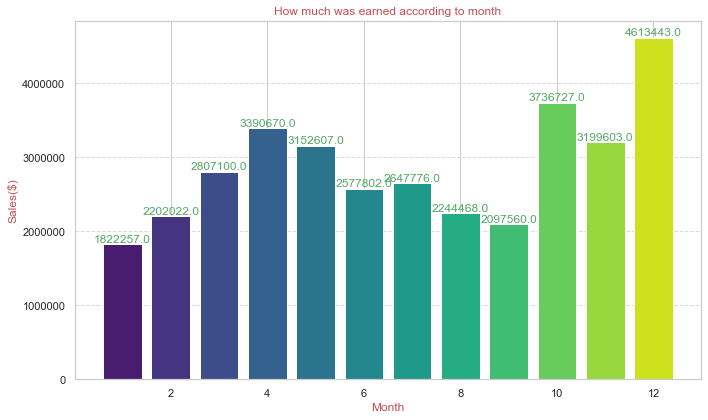

In [19]:
months = range(1, 13)

# Set Seaborn style
sns.set(style="whitegrid")

# Bar chart with Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(months, result, color=sns.color_palette("viridis", len(months)))
plt.xlabel('Month', c='r')
plt.ylabel('Sales($)', c='r')
plt.title('How much was earned according to month', c = 'r')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, round(yval), ha='center', va='bottom', c='g')

plt.show()

Question 2: What city had the highest number of sales

In [20]:
copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [21]:
list = '682 Chestnut St, Boston, MA 02215'
print(list.split(',')[1])

 Boston


In [22]:
copy_all_data['Purchase Address'].dtype

dtype('O')

In [23]:
# First we need to extract the city name from Address object
copy_all_data['City'] = copy_all_data['Purchase Address'].str.split(',').str[1]

In [24]:
copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [25]:
# Assuming 'Purchase Address', 'Sales', and 'Month' are columns in the DataFrame


# Assuming 'Sales' and 'Month' are columns in the DataFrame
sales_by_city_month = copy_all_data.groupby(['City', 'Month']).sum()['Sales'].unstack()


sales_by_city_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
Atlanta,149159.54,176470.30,231905.38,284448.91,238853.99,219816.47,211766.47,169267.66,171278.89,306293.01,275338.70,360899.26
Austin,88087.06,108787.40,154549.27,172683.59,160635.22,144057.29,150324.93,125713.61,106483.70,203196.12,171286.47,233777.09
Boston,201088.49,214808.36,301023.81,353807.11,328803.65,254747.89,291497.14,239275.26,248408.73,367036.39,351546.02,509599.16
Dallas,143462.51,186667.99,222376.68,251360.48,268456.49,186885.75,212325.17,179763.46,164212.86,323135.60,248609.56,380718.85
Los Angeles,288601.90,342061.66,429929.37,550264.02,499689.21,451531.93,394334.64,345893.50,354075.69,612453.25,499690.79,684044.84
New York City,260591.29,305372.26,367262.20,449447.75,436126.40,324148.58,355716.10,303183.46,300563.83,486954.41,428180.32,646770.83
Portland,114985.56,149451.86,187208.01,239978.12,231708.01,169587.35,176415.63,152877.74,132571.44,254100.86,207891.92,303714.11
San Francisco,435588.33,547072.34,693726.96,812426.19,776679.49,613173.48,642881.76,538778.10,463595.72,866700.98,764979.29,1106601.27
Seattle,140692.05,171330.25,219118.70,276254.07,211654.29,213853.52,212513.92,189715.09,156369.27,316856.26,252080.13,387317.93


In [26]:
print(sales_by_city_month.index)
print(sales_by_city_month.columns)


Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='City')
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')


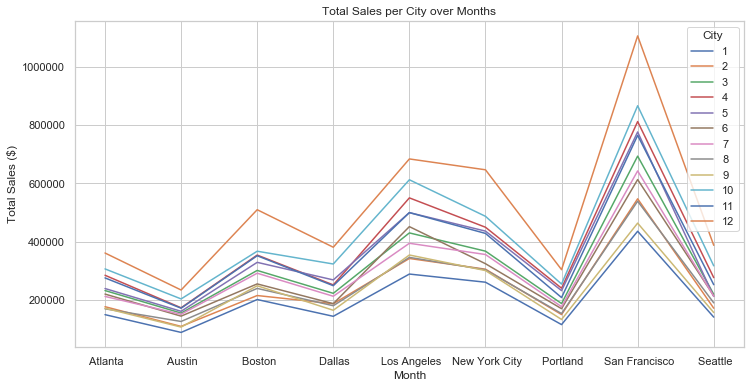

In [27]:
# Plotting a line chart for each city
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for city in sales_by_city_month.columns:
    plt.plot(sales_by_city_month.index, sales_by_city_month[city], label = city)
    
 
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales per City over Months')
plt.legend(title='City', loc='upper right')
plt.show()

Question 3: What time should we display advertisments to maximize likelihood of customer's buying products?

In [28]:
copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [29]:
copy_all_data['Order Date Format'] = pd.to_datetime(copy_all_data['Order Date'])

In [30]:
copy_all_data['Hour'] = copy_all_data['Order Date Format'].dt.hour
copy_all_data['Minute'] = copy_all_data['Order Date Format'].dt.minute

In [31]:
copy_all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date Format,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30


In [32]:
#Extract the unique Hour
#copy_all_data['Hour'].unique()

hours = [hour for hour, df in copy_all_data.groupby('Hour')]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [33]:
total_sale_per_Hour = copy_all_data.groupby('Hour').count()['Sales']

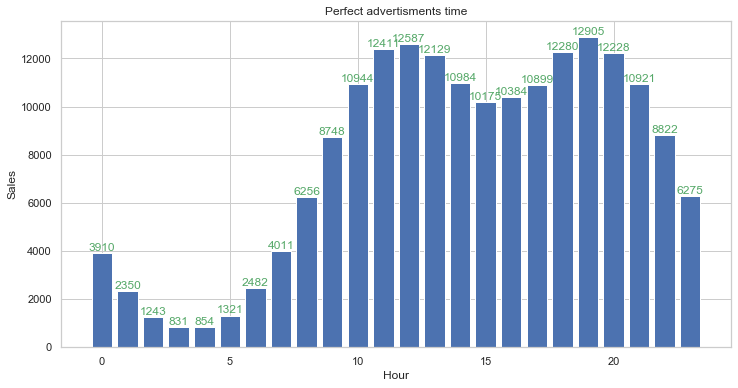

In [34]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

bars = plt.bar(hours, total_sale_per_Hour)
plt.title('Perfect advertisments time')
plt.xlabel('Hour')
plt.ylabel('Sales')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, round(yval), ha='center', va='bottom', c='g')

plt.show()



Question 4: What products are most often sold together?

Hint: identify orders with the same 'Order ID' and then analyze the combinations of products within those orders.

In [35]:
copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date Format,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


In [36]:
copy_all_data.groupby('Order ID').sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Order ID,,,,,,
141234,1,700.00,1,700.00,21,25
141235,1,14.95,1,14.95,14,15
141236,2,11.99,1,23.98,13,33
141237,1,149.99,1,149.99,20,33
141238,1,11.99,1,11.99,11,59
...,...,...,...,...,...,...
319666,1,14.95,12,14.95,20,58
319667,2,3.84,12,7.68,12,1
319668,1,400.00,12,400.00,6,43


In [37]:
# a = {'oder id':[1,2,3,3,5,5],
#      'product': ['a','b','c','d','e','f']}


# df = pd.DataFrame(a)

# print(df)

# df[df['oder id'].duplicated(keep=False)]
# df[df['oder id'].duplicated()]


In [38]:
df = copy_all_data[copy_all_data['Order ID'].duplicated(keep=False)] 

copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date Format,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date Format,Hour,Minute
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-03 19:42:00,19,42
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,2019-04-03 19:42:00,19,42
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,2019-04-07 11:31:00,11,31


In [40]:
# # Define the lambda function
# concatenate_with_commas = lambda x: ','.join(x)

# # Example usage with a list of strings
# words = ['apple', 'orange', 'banana']
# result = concatenate_with_commas(words)

# print(result)

In [41]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

#print(df.head(3))
# Remove the duplicate value
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [42]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count 

Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

In [43]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [44]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


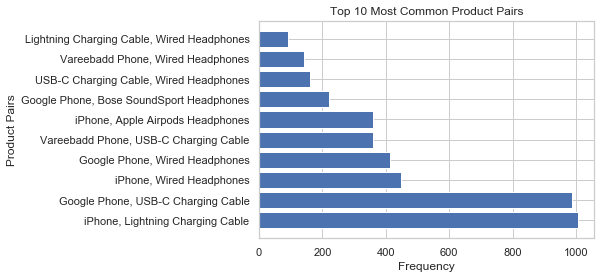

In [45]:
# Assuming 'count' is a Counter object
top_10 = count.most_common(10)

# Unpack keys and values
keys, values = zip(*top_10)

# Create a list of labels for each bar
labels = [f"{key[0]}, {key[1]}" for key in keys]

plt.barh(labels, values)
plt.xlabel('Frequency')
plt.ylabel('Product Pairs')
plt.title('Top 10 Most Common Product Pairs')
plt.show()



In [46]:
for key in keys:
    print(f"{key[0]} ,{key[1]}")

iPhone ,Lightning Charging Cable
Google Phone ,USB-C Charging Cable
iPhone ,Wired Headphones
Google Phone ,Wired Headphones
Vareebadd Phone ,USB-C Charging Cable
iPhone ,Apple Airpods Headphones
Google Phone ,Bose SoundSport Headphones
USB-C Charging Cable ,Wired Headphones
Vareebadd Phone ,Wired Headphones
Lightning Charging Cable ,Wired Headphones


In [47]:
for key in keys:
    print(key)

('iPhone', 'Lightning Charging Cable')
('Google Phone', 'USB-C Charging Cable')
('iPhone', 'Wired Headphones')
('Google Phone', 'Wired Headphones')
('Vareebadd Phone', 'USB-C Charging Cable')
('iPhone', 'Apple Airpods Headphones')
('Google Phone', 'Bose SoundSport Headphones')
('USB-C Charging Cable', 'Wired Headphones')
('Vareebadd Phone', 'Wired Headphones')
('Lightning Charging Cable', 'Wired Headphones')


Question 5: What product sold the most? Why do you think it sold the most?

In [48]:
copy_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date Format,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30 09:27:00,9,27


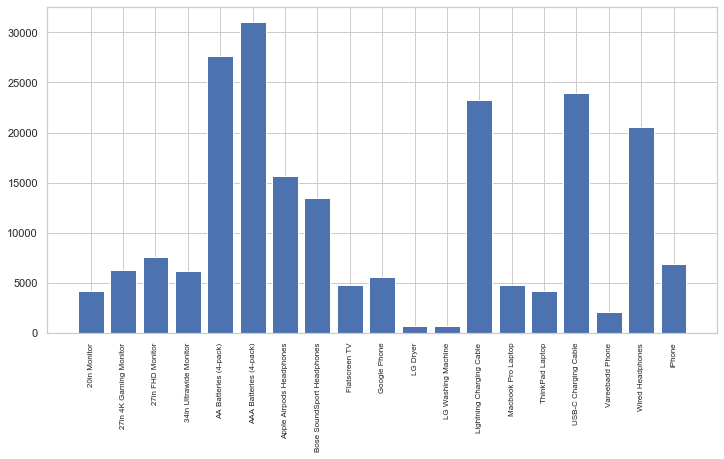

In [49]:
product_grouped = copy_all_data.groupby('Product')
#print(product_grouped.sum())

quantity_oredered = product_grouped.sum()['Quantity Ordered']

products = [product for product, df in product_grouped]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.bar(products, quantity_oredered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

In [50]:
copy_all_data.groupby('Product').mean()['Price Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64